## Abstract

El siguiente trabajo tiene como propósito dar una solución para un problema de negocios, dando énfasis a la generación de un modelo predictivo de clasificación de ventas futuras.

Se presenta la definición del contexto comercial del problema que se quiere dar solución, donde el foco principal es la predicción de ventas de un videojuego por desarrollar en base a un valor referencial que separe entre éxito y fracaso en ventas. Esto, con el fin de lograr convencer al equipo de finanzas en la asignaciónd de presupuesto para el proeycto.

Mediante el contexto analítico se muestra cómo se presenta el dataset a utilizar, sus características y cómo se debería tratar para poder servir como input en el modelo predictivo de ventas.

Se realiza un análisis exploratorio de datos, donde se ve el comportamiento de distintas variables y cómo estás afectarían a la predicción de ventas. En base a esto, se van respondiendo diversas preguntas que van surgiendo a medida que avanza el análisis, y al mismo tiempo, se van validando hipótesis de distintos insights para terminar con una conclusión final de estas.

Finalmente, habiendo realizado la limpieza de datos, escalamiento y otras medidas de procesamiento, se presenta la predicción mediante un modelo de machine learning.

## Definición de objetivo

A lo largo del tiempo se ha visto un aumento exhaustivo en las ventas de videojuegos. El desarrollo de esta industria se ha visto marcado por una fuerte evolución tanto comercialmente como artísticamente. Día a día, nuevos proyectos son desarrollados por equipos multidisciplinarios con el fin de lanzar al mercado una obra que sea exitosa entre los consumidores.

Sin embargo, no todas las creaciones llegan a tener éxito y son muchos los desarrolladores que deciden abandonar la industria debido a esto. Por esta razón, el objetivo de este trabajo investigativo es determinar que factores influyen mayoritariamente en las ventas de videojuegos y, en base a eso, poder generar un modelo predictivo de ventas que permita determinar si un videojuego va a ser exitoso o no.


## Contexto Comercial

La gerencia de Administración y Finanzas de cierta compañía desarrolladora de videojuegos esta evaluando el presupuesto a asignar a un nuevo videojuego. Usted como miembro del equipo del equipo de Desarrollo de Proyectos debe evaluar la factibilidad económica del nuevo proyecto. Para eso, le encargan a poder determinar si el proyecto a desarrollar será un éxito de ventas o no.

Para esta tarea pretende realizar un modelo de machine learning, el cual debe clasificar si un videojuego esta sobre cierto nivel de ventas en comparación al resto de la industria o no, ya que de esto depende si se asigna presupuesto adicional para desarrollar el videojeugo, en caso de ser necesario. Actualmente usted dispone de datos sobre ventas de distintos videojuegos desde 1980 hasta 2016.

## Problema Comercial

Su tarea es **generar un modelo de clasificación que permita estimar si un videojuego es exitoso o no considerando sus características.**

## Contexto Analítico

Para poder diseñar el modelo de clasificación, usted dispone de un dataset con mas de 100.000 videojuegos de distintas plataformas. Este dataset, como se dijo anteriormente, comprende datos desde 1980 hasta 2016. Dicho dataset considera, además, datos relacionados a la puntuación realizada por la crítica especializada y consumidores de videojuegos que son usuarios en Metacritic, sitio reconocido de críticas de videojuegos.

Sin embargo, no todos los videojuegos incluidos tienen la data completa, por lo que será tarea de usted el determinar qué variables son relevantes para el problema de negocios y si es necesario realizar una agrupación en base a alguna variable o unas variables en particular.

## Preguntas/Problemas a resolver

En base al contexto planteado previamente, el problema a resolver se puede definir de la siguiente manera:

**¿Es posible determinar cierto nivel de ventas para un videojuego en base a ciertas características del mismo?**

## Análisis Exploratorio de Datos (EDA)
### Dataset

---

#### Descripción del Dataset
Este dataset incluye datos de más de 100.000 videojuegos de distintas plataformas desde 1980 hasta 2016. Dentro de la data que contiene está la plataforma, año de lanzamiento, ventas totales, puntaje de crítica, desarrollado, rating, entre otros.

*Fuente:*

[Kaggle: Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

#### Descripción de Variables
| Columna | Descripción |
| --- | --- |
| Rank | Ranking de las ventas promedio |
| Name | Nombre del videojuego |
| Platform | Plataforma de lanzamiento del videojuego (PC, PS4, etc.) |
| Year | Año de lanzamiento del videojuego |
| Genre | Género del videojuego |
| Publisher | Editor del videojuego |
| NA_Sales | Ventas en Norteamérica (en millones) |
| EU_Sales | Ventas en Europa (en millones) |
| JP_Sales | Ventas en Japón (en millones) |
| Other_Sales | Ventas en el resto del mundo (en millones) |
| Global_Sales | Ventas totales a nivel mundial. |
| Critic_score | Puntaje agregado del staff de Metacritic |
| Criticcount | Número de críticas usadas para obtener el puntaje del staff |
| User_score | Puntaje asignado por los suscriptores de Metacritic |
| Usercount | Número de usuarios que dieron puntaje de crítica |
| Developer | Desarrollador |
| Rating | Rating asignado por la ESRB |

In [1]:
# Llibrerías a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Importamos el dataset
vgamesales_url = 'https://raw.githubusercontent.com/jbeltrang/datasets-ch/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
vgamesales = pd.read_csv(vgamesales_url)
vgamesales

# Hacemos un dataframe trabajable y limpiamos la data que sea mayor al 2016
vgamesales_df = vgamesales
vgamesales_df = vgamesales_df.loc[vgamesales_df['Year_of_Release'] <= 2016]
vgamesales_df = vgamesales_df.dropna(subset=['Year_of_Release'])

In [3]:
# Tipos de variables
vgamesales_df_types = vgamesales_df.dtypes
print("Tipos de variables:\n")
print(vgamesales_df_types)

## Identificación de cantidad de NaN por columna
nan_count = vgamesales_df.isna().sum()
print("\nNaN por columna:\n")
print(nan_count)

# Análisis Estadístico de variables numéricas

## Seleccionamos solo las columnas numéricas
vgamesales_numeric_df = vgamesales_df.select_dtypes(include=[np.number])

## Cálculo de la media por columna
mean = vgamesales_numeric_df.mean()
print("\nMedia:\n")
print(mean)

## Cálculo de la mediana por columna
median = vgamesales_numeric_df.median()
print("\nMediana:\n")
print(median)

## Cálculo de la desviación estándar por columna
standard_deviation = vgamesales_numeric_df.std()
print("\nDesviación estándar:\n")
print(standard_deviation)

## Cálculo de la varianza por columna
variance = vgamesales_numeric_df.var()
print("\nVarianza:\n")
print(variance)

## Cálculo de otros estadísticos relevantes
print("\nMínimo:\n")
print(vgamesales_numeric_df.min())

print("\nMáximo:\n")
print(vgamesales_numeric_df.max())

print("\nQuantiles:\n")
print(vgamesales_numeric_df.quantile([0.25, 0.5, 0.75]))

Tipos de variables:

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

NaN por columna:

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer          6540
Rating             6678
dtype: int64

Media:

Year_of_Release    2006.484616
NA_Sales              0.264089
EU_Sales              0.145945
JP_Sales       

## Selección de Variables y Encoding

In [4]:
# Definimos un subset para trabajar la selección de variables

vgamesales_set = vgamesales
# Drop de valores nulos y limpieza
vgamesales_set = vgamesales_set.dropna(subset=['Year_of_Release','Genre',"Critic_Score","User_Score"])
vgamesales_set = vgamesales_set.loc[vgamesales_set['User_Score'] != "tbd"]
# Conversión de fechas
vgamesales_set['Year_of_Release'] = pd.to_datetime(vgamesales_set['Year_of_Release'], format="%Y")
vgamesales_set['Year'] = vgamesales_set['Year_of_Release'].dt.year
# Obtener la columna de años
years = vgamesales_set['Year']
# Calcular las décadas correspondientes
decades = (years // 10) * 10
# Subset
vgamesales_set = vgamesales_set[["Platform","Year","Genre","Global_Sales","Critic_Score","User_Score"]]
# One-hot Encoding
vgamesales_set = pd.get_dummies(vgamesales_set, columns=["Platform","Genre"])
decades_encoded = pd.get_dummies(decades, prefix='Decade')
# Concatenar las columnas de décadas con el dataset original
vgamesales_set_encoded = pd.concat([vgamesales_set, decades_encoded], axis=1)
# Eliminar la columna original de "Year"
vgamesales_set_encoded.drop('Year', axis=1, inplace=True)
vgamesales_set = vgamesales_set_encoded

# Normalización de los Scores
Critic_Score_normalizado = StandardScaler().fit_transform(vgamesales_set['Critic_Score'].values.reshape(-1, 1))
vgamesales_set['Critic_Score'] = Critic_Score_normalizado
User_Score_normalizado = StandardScaler().fit_transform(vgamesales_set['User_Score'].values.reshape(-1, 1))
vgamesales_set['User_Score'] = User_Score_normalizado

vgamesales_set

,Global_Sales,Critic_Score,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Decade_1980,Decade_1990,Decade_2000,Decade_2010
0,82.53,0.414248,0.566522,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,35.52,0.847146,0.774898,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,32.77,0.702847,0.566522,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,29.80,1.352194,0.913816,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,28.92,-0.884446,-0.405902,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,0.01,0.774997,1.122193,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16696,0.01,0.702847,0.288686,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16700,0.01,-0.667997,-0.961573,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
16706,0.01,-0.740146,0.010851,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Luego de haber hecho el set a trabajar, ajustamos la variable Global_sales para generar un modelo de clasificación. Para eso haremos un barplot que nos permita observar la variable y como esta se acumula.

<Axes: >

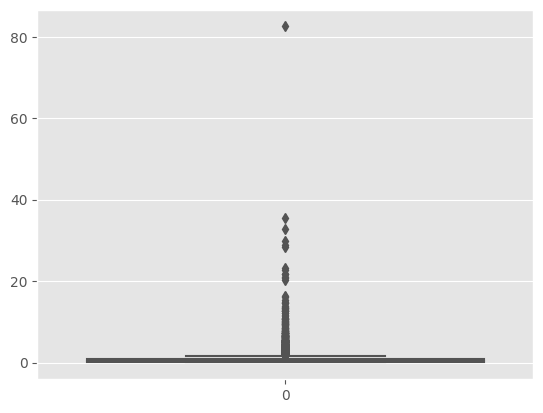

In [5]:
sns.boxplot(data=vgamesales_set["Global_Sales"])

En base a lo anterior, definimos una variable categórica que tomará el valor 1 cuando Global_Sales sea mayor a la media y 0 de lo contrario.

In [6]:
# Calcular el promedio de las ventas globales
global_sales_mean = vgamesales_set['Global_Sales'].mean()

# Crear una nueva columna llamada "Sales_Category" y asignar 1 si "Global_Sales" es mayor que el promedio, y 0 en caso contrario
vgamesales_set['Sales_Category'] = np.where(vgamesales_set['Global_Sales'] > global_sales_mean, 1, 0)
vgamesales_set.drop('Global_Sales', axis=1, inplace=True)

## Análisis de Correlación

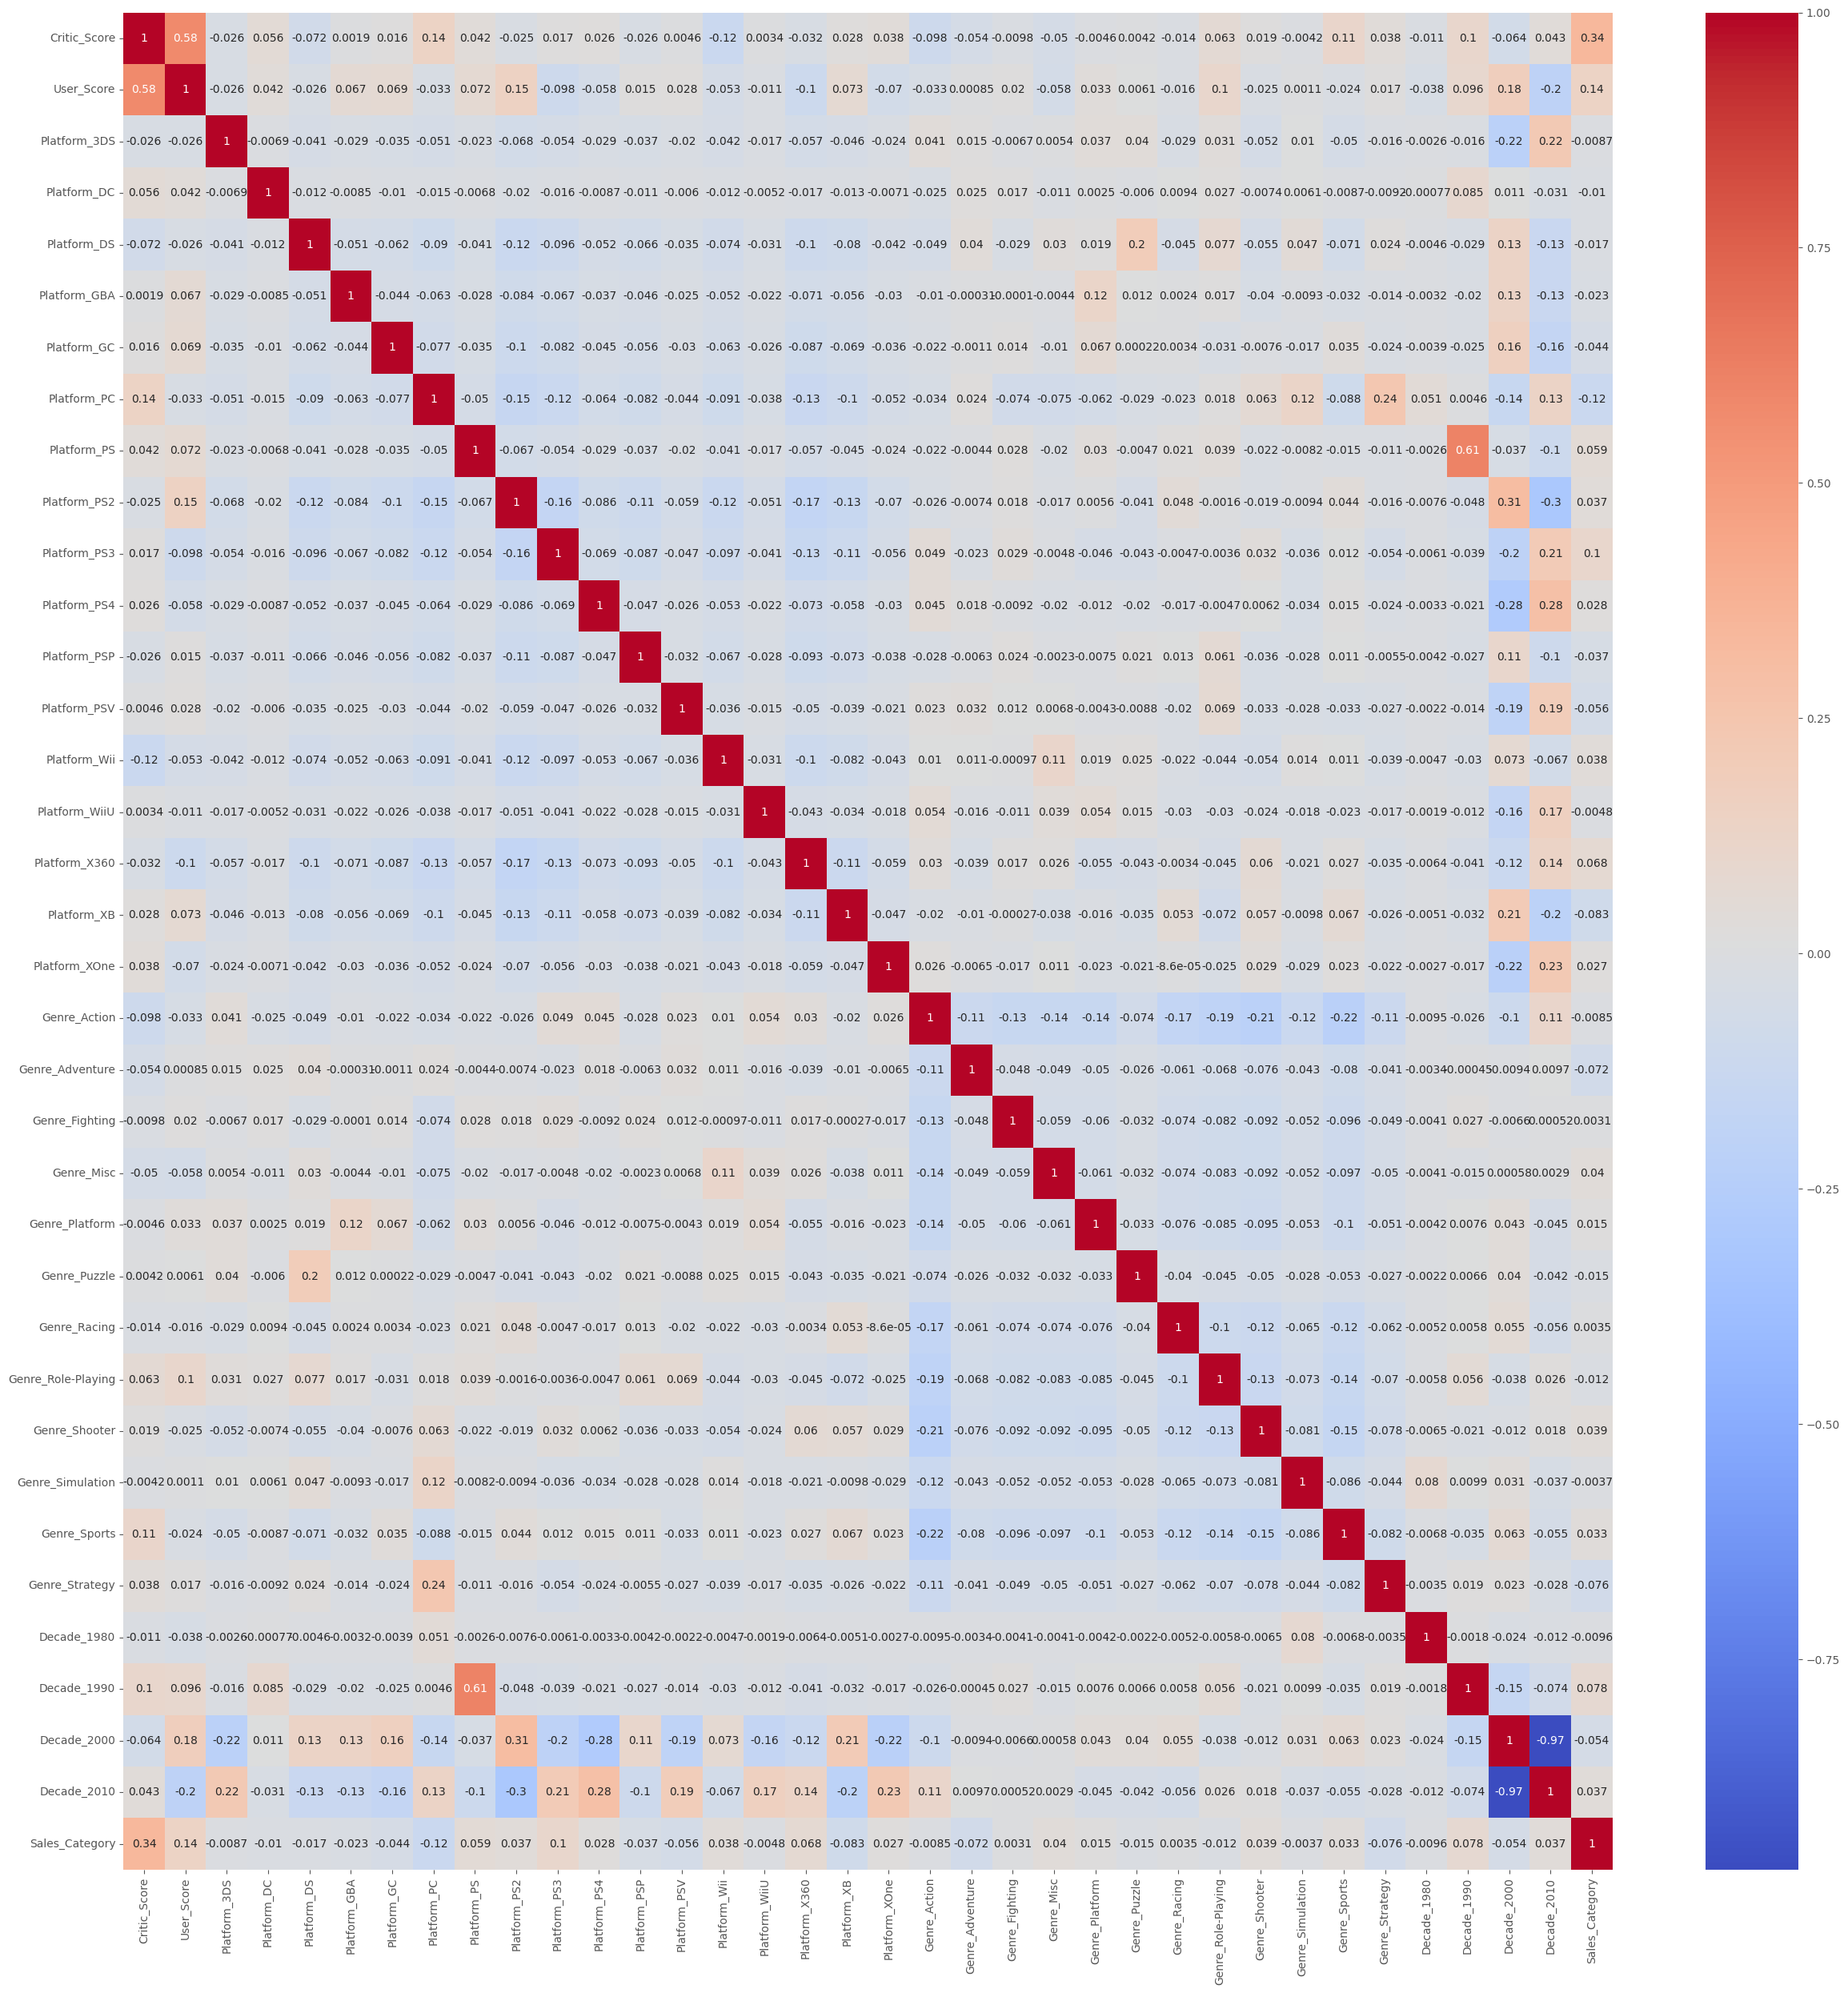

In [7]:
# Crear la matriz de correlación
correlation_matrix = vgamesales_set.corr()

# Configurar el heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el Heatmap
plt.show()

## Modelamiento

In [8]:
X = vgamesales_set.drop('Sales_Category', axis=1)
y = vgamesales_set['Sales_Category']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

# Calcular la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Exhaustividad (Recall):", recall)

# Calcular la puntuación F1
f1 = f1_score(y_test, y_pred)
print("Puntuación F1:", f1)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud (Accuracy):", accuracy)

Precisión: 0.7216828478964401
Exhaustividad (Recall): 0.4144981412639405
Puntuación F1: 0.5265643447461629
Exactitud (Accuracy): 0.806186563557274


## Interpretación

**Precisión**

La precisión obtenida es de aproximadamente 0.72, lo que significa que alrededor del 72% de las instancias clasificadas como positivas fueron clasificadas correctamente.

**Recall**

El Recall obtenido es de aproximadamente 0.41, lo que significa que alrededor del 41% de las instancias positivas fueron identificadas correctamente por el modelo.

**Puntuación F1**

La puntuación F1 obtenida es de aproximadamente 0.53, lo que indica un equilibrio razonable entre la precisión y el recall.

**Accuracy**

El accuracy obtenido es de aproximadamente 0.81, lo que significa que alrededor del 81% de las instancias fueron clasificadas correctamente por el modelo.

En resumen, los resultados indican que el modelo tiene una precisión y accuracy decentes, lo que significa que es capaz de clasificar correctamente la mayoría de las instancias. Sin embargo, el recall es relativamente bajo, lo que indica que el modelo puede perder algunas instancias positivas. La puntuación F1 muestra un equilibrio razonable entre la precisión y el recall. Dependiendo del contexto y los requisitos específicos del problema, puede ser necesario ajustar el modelo o utilizar otras métricas de evaluación para obtener un rendimiento óptimo.

## Validación Cruzada

In [9]:
# Realizar validación cruzada con 35 folds
scores = cross_val_score(model, X, y, cv=35)

# Mostrar los resultados
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio:", scores.mean())

Puntajes de validación cruzada: [0.81218274 0.82233503 0.79187817 0.82233503 0.8071066  0.78172589
 0.83248731 0.82233503 0.79695431 0.74619289 0.8071066  0.80203046
 0.81725888 0.79695431 0.81725888 0.79187817 0.8071066  0.8071066
 0.83248731 0.86294416 0.78680203 0.7715736  0.79187817 0.79695431
 0.8071066  0.8071066  0.78172589 0.81725888 0.81725888 0.8071066
 0.79695431 0.83248731 0.81218274 0.81725888 0.80612245]
Puntaje promedio: 0.806498349883826


## Interpretación

El puntaje promedio de validación cruzada es 0.81 aproximadamente, lo que indica que en promedio el modelo tiene un rendimiento aceptable. Sin embargo, es importante considerar que este puntaje es específico para los datos y modelo utilizados en la validación cruzada. En este caso, la variabilidad de los puntajes obtenidos es baja, por lo que se puede considerar que se puede seguir sosteniendo que el modelo tiene un buen rendimiento.